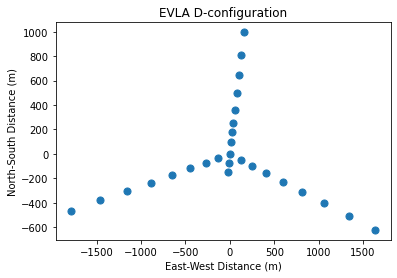

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Antenna coordinates
coords = np.array([
    [76.69, 11.67, -108.36],
    [49.29, -123.87, -67.42],
    [96.46, -248.46, -136.94],
    [156.49, -407.06, -225.51],
    [228.83, -597.84, -331.98],
    [311.96, -817.22, -454.39],
    [405.70, -1064.49, -592.36],
    [509.53, -1338.54, -745.23],
    [623.12, -1638.19, -912.51],
    [151.26, 23.33, -218.44],
    [37.71, 135.65, -50.59],
    [73.37, 271.95, -103.23],
    [118.76, 445.77, -170.46],
    [173.02, 653.27, -250.51],
    [235.66, 893.16, -343.18],
    [305.29, 1163.76, -448.46],
    [381.68, 1463.33, -565.35],
    [465.79, 1790.89, -692.95],
    [2.24, 0.05, 1.71],
    [-100.24, -15.93, 152.45],
    [-174.91, -27.56, 262.39],
    [-249.59, -39.15, 372.31],
    [-361.68, -56.66, 537.09],
    [-495.22, -77.43, 733.79],
    [-645.82, -100.90, 955.52],
    [-812.58, -126.88, 1200.98],
    [-995.39, -155.53, 1469.71]])

rotated_coords = np.array([[-x, -y, z] for x, y, z in coords])

# Antenna configurations plot
fig, ax = plt.subplots()
ax.scatter(rotated_coords[:, 1], rotated_coords[:, 0], marker='o', s=50)
ax.set_xlabel('East-West Distance (m)')
ax.set_ylabel('North-South Distance (m)')
ax.set_title('EVLA D-configuration')
plt.show()

This code defines the position of antenna for the D-configuration that is taken from the EVLA D-configuration pdf and are plotted using a scatter plot. The coordinates are rotated to match the expected orientation of the plot, with the East-West distance along the x-axis and the North-South distance along the y-axis.

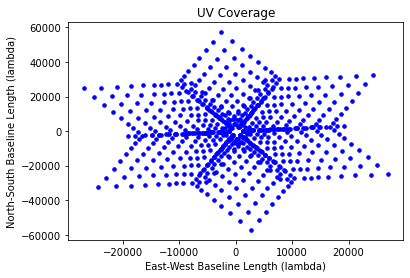

In [11]:
import numpy as np
import matplotlib.pyplot as plt

c = 299792458  # Speed of light
frequency = 5e9  # 5 GHz
wavelength = c / frequency

coords = np.array([
    [76.69, 11.67, -108.36],
    [49.29, -123.87, -67.42],
    [96.46, -248.46, -136.94],
    [156.49, -407.06, -225.51],
    [228.83, -597.84, -331.98],
    [311.96, -817.22, -454.39],
    [405.70, -1064.49, -592.36],
    [509.53, -1338.54, -745.23],
    [623.12, -1638.19, -912.51],
    [151.26, 23.33, -218.44],
    [37.71, 135.65, -50.59],
    [73.37, 271.95, -103.23],
    [118.76, 445.77, -170.46],
    [173.02, 653.27, -250.51],
    [235.66, 893.16, -343.18],
    [305.29, 1163.76, -448.46],
    [381.68, 1463.33, -565.35],
    [465.79, 1790.89, -692.95],
    [2.24, 0.05, 1.71],
    [-100.24, -15.93, 152.45],
    [-174.91, -27.56, 262.39],
    [-249.59, -39.15, 372.31],
    [-361.68, -56.66, 537.09],
    [-495.22, -77.43, 733.79],
    [-645.82, -100.90, 955.52],
    [-812.58, -126.88, 1200.98],
    [-995.39, -155.53, 1469.71]
])
baselines = np.zeros((len(coords) * (len(coords) - 1) // 2, 3))
k = 0
for i in range(len(coords)):
    for j in range(i+1, len(coords)):
        baselines[k, :] = coords[j, :] - coords[i, :]
        k += 1

# baseline lengths to wavelengths
baselines_wavelength = baselines / wavelength

# UV coverage
fig, ax = plt.subplots()

color = 'b'
ax.scatter(baselines_wavelength[:, 0], baselines_wavelength[:, 1], marker='.', s=50, color=color)
ax.scatter(-baselines_wavelength[:, 0], -baselines_wavelength[:, 1], marker='.', s=50, color=color)  # opposite sign
ax.set_xlabel('East-West Baseline Length (lambda)')
ax.set_ylabel('North-South Baseline Length (lambda)')
ax.set_title('UV Coverage')
plt.show()

This code calculates and plots the UV coverage for an array of antennas at a given frequency. The UV coverage represents all the possible baselines between pairs of antennas in an interferometer, which is an array of antennas used to make high-resolution images of the sky.
Import necessary libraries: numpy for numerical calculations and matplotlib.pyplot for plotting. The constants are defined. Calculate the wavelength using the formula wavelength = c / frequency.
Define the coords array, which contains the 3D Cartesian coordinates (in meters) of each antenna in the array. Initialize the baselines array to store the 3D baselines between each pair of antennas. Calculate baselines between each pair of antennas using nested loops: For each pair of antennas i and j, the baseline is calculated as: baselines[k] = coords[j] - coords[i].
Increment the counter k after each baseline calculation. Convert baseline lengths from meters to wavelengths by dividing the baselines array by the wavelength. Plot the UV coverage as scatter plot with east-west (X-axis) and north-south (Y-axis) baseline lengths in wavelengths.

equations used:
1. Wavelength calculation: wavelength = c / frequency
2. Baseline calculation for each antenna pair: baseline = coords[j] - coords[i]
3. Conversion of baseline lengths to wavelengths: baselines_wavelength = baselines / wavelength


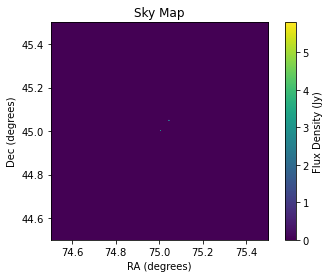

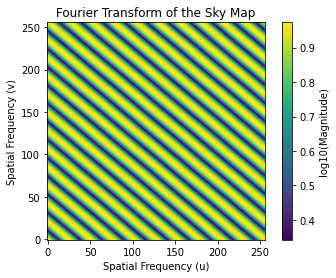

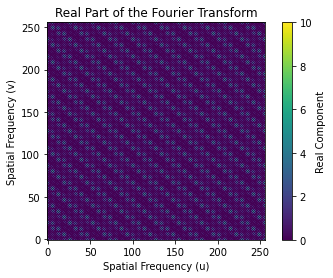

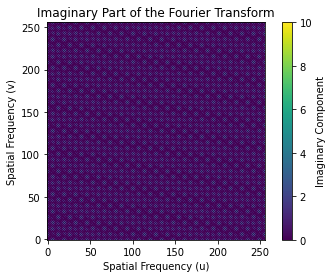

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.fft import fft2,fftshift

# Source 1 & 2
src1_coord = SkyCoord('05h00m00s', '+45d00m00s', frame='icrs')
src1_flux = 3.6

src2_coord = SkyCoord('05h00m10s', '+45d03m00s', frame='icrs')
src2_flux = 5.8

# Convert coord to deg
src1_ra_deg = src1_coord.ra.deg
src1_dec_deg = src1_coord.dec.deg

src2_ra_deg = src2_coord.ra.deg
src2_dec_deg = src2_coord.dec.deg

ra_range = 0.5
dec_range = 0.5

ra_min = src1_ra_deg - ra_range
ra_max = src1_ra_deg + ra_range
dec_min = src1_dec_deg - dec_range
dec_max = src1_dec_deg + dec_range

# 2D grid of pixels (256 x 256)
pixel_resolution = (256,256)
sky_map = np.zeros(pixel_resolution)

# Indices of the pixels to the sources
src1_pixel = (pixel_resolution[1] // 2, pixel_resolution[0] // 2)  # Place Source 1 in the center
src2_pixel = ((src2_ra_deg - ra_min) / (ra_max - ra_min) * pixel_resolution[0],
              (src2_dec_deg - dec_min) / (dec_max - dec_min) * pixel_resolution[1])

# FD of the sources to the corresponding pixels
sky_map[int(src1_pixel[1]), int(src1_pixel[0])] = src1_flux
sky_map[int(src2_pixel[1]), int(src2_pixel[0])] = src2_flux

# Compute the Fourier Transform of the sky map
fft_sky_map = np.fft.fftshift(np.fft.fft2(sky_map))

# Compute the magnitudes of the Fourier Transform
fft_magnitude = np.abs(fft_sky_map)

# Separating the real and imaginary parts of the FT
real_fft_magnitude = fft_sky_map.real
imaginary_fft_magnitude = fft_sky_map.imag

# Plot the sky map
plt.imshow(sky_map, cmap='viridis', origin='lower', extent=(ra_min, ra_max, dec_min, dec_max))
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Sky Map')
plt.colorbar(label='Flux Density (Jy)')
plt.show()

# Plot the FT
plt.imshow(np.log10(fft_magnitude), cmap='viridis', origin='lower')
plt.xlabel('Spatial Frequency (u)')
plt.ylabel('Spatial Frequency (v)')
plt.title('Fourier Transform of the Sky Map')
plt.colorbar(label='log10(Magnitude)')
plt.show()

# Plot the real part of the FT
plt.figure()
plt.imshow(real_fft_magnitude, cmap='viridis', origin='lower',vmin=0, vmax=10)
plt.xlabel('Spatial Frequency (u)')
plt.ylabel('Spatial Frequency (v)')
plt.title('Real Part of the Fourier Transform')
plt.colorbar(label='Real Component')
plt.show()

# Plot the imag part of the FT
plt.figure()
plt.imshow(imaginary_fft_magnitude, cmap='viridis', origin='lower',vmin=0, vmax=10)
plt.xlabel('Spatial Frequency (u)')
plt.ylabel('Spatial Frequency (v)')
plt.title('Imaginary Part of the Fourier Transform')
plt.colorbar(label='Imaginary Component')
plt.show()

This code creates a simulated sky map with two sources, computes the Fourier Transform (FT) of the sky map, and plots the sky map, the magnitude of the FT, the real and imaginary part of the FT. 
Define the coordinates and flux densities of two sources (Source 1 and Source 2) using SkyCoord from the astropy.coordinates package.

After importing the necessary libraries, the coordinates of the sources are converted from right ascension (RA) and declination (Dec) to degrees. Define the RA and Dec ranges for the sky map. Created a 2D grid of pixels (256 x 256) to represent the sky map. 
Calculated the pixel indices corresponding to the positions of the two sources. 
Assigned the flux densities of the sources to the corresponding pixels in the sky map.
Computed the Fourier Transform of the sky map using the fft2 function from the scipy.fft package. The fftshift function is used to shift the zero-frequency component to the center of the spectrum.
Calculated the magnitudes of the Fourier Transform.Separate the real and imaginary parts of the Fourier Transform.
Plotted the sky map, the magnitude of the Fourier Transform, the real part and the imaginary part of the Fourier Transform using matplotlib.pyplot.

Equations used: 
1. Conversion of RA and Dec to pixel indices:
src_pixel_x = (src_ra_deg - ra_min) / (ra_max - ra_min) * pixel_resolution[0]
src_pixel_y = (src_dec_deg - dec_min) / (dec_max - dec_min) * pixel_resolution[1]

2. Fourier Transform of the sky map: F(sky_map).

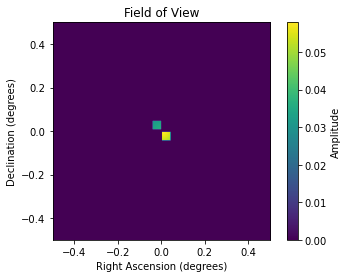

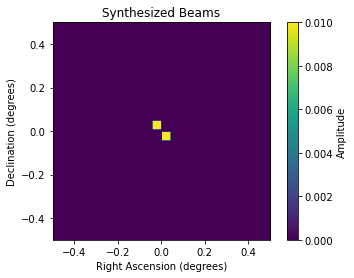

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.convolution import convolve_fft

# Define the positions and flux densities of the sources
source1_ra, source1_dec, source1_flux = '05h00m00s', '+45d00m00s', 3.6
source2_ra, source2_dec, source2_flux = '05h00m10s', '+45d03m00s', 5.8

# Convert RA and DEC to decimal degrees using SkyCoord
coord1 = SkyCoord(source1_ra, source1_dec, frame='icrs')
source1_ra_deg = coord1.ra.deg
source1_dec_deg = coord1.dec.deg
coord2 = SkyCoord(source2_ra, source2_dec, frame='icrs')
source2_ra_deg = coord2.ra.deg
source2_dec_deg = coord2.dec.deg

# Field of View (FoV) parameters
fov_deg = 1.0  # FoV size in degrees
fov_image_size = 256  # Number of pixels in the FoV image

# Convert RA and DEC to image coordinates
center_ra_deg = (source1_ra_deg + source2_ra_deg) / 2
center_dec_deg = (source1_dec_deg + source2_dec_deg) / 2
source1_x = int(fov_image_size / 2 + (source1_ra_deg - center_ra_deg) / fov_deg * fov_image_size)
source1_y = int(fov_image_size / 2 + (source1_dec_deg - center_dec_deg) / fov_deg * fov_image_size)
source2_x = int(fov_image_size / 2 + (source2_ra_deg - center_ra_deg) / fov_deg * fov_image_size)
source2_y = int(fov_image_size / 2 + (source2_dec_deg - center_dec_deg) / fov_deg * fov_image_size)

# Create a simulated sky map using the sources' flux densities and positions
sky_map = np.zeros((fov_image_size, fov_image_size))
sky_map[source1_y, source1_x] = source1_flux
sky_map[source2_y, source2_x] = source2_flux

# Create a simulated primary beam response
x = np.linspace(-1, 1, fov_image_size)
y = np.linspace(-1, 1, fov_image_size)
xx, yy = np.meshgrid(x, y)
primary_beam = np.exp(-(xx**2 + yy**2) / (2 * 0.2**2))

# Create a simulated synthesized beam
synthesized_beam = np.zeros((fov_image_size, fov_image_size))
synthesized_beam[123:133, 123:133] = 1 / 100

# Convolve the sky map with the synthesized beam
convolved_sky_map = convolve_fft(sky_map, synthesized_beam, normalize_kernel=True)

# Multiply the convolved sky map by the primary beam response
fov = convolved_sky_map * primary_beam

# Create an empty image for the synthesized beams
synthesized_beams_map = np.zeros((fov_image_size, fov_image_size))

# Add the synthesized beams at the positions of the sources
synthesized_beams_map[source1_y-5:source1_y+5, source1_x-5:source1_x+5] = synthesized_beam[123:133, 123:133]
synthesized_beams_map[source2_y-5:source2_y+5, source2_x-5:source2_x+5] = synthesized_beam[123:133, 123:133]

# Plot the resulting FoV
plt.imshow(fov, cmap="viridis", extent=[-fov_deg / 2, fov_deg / 2, -fov_deg / 2, fov_deg / 2])
plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")
plt.title("Field of View")
plt.colorbar(label='Amplitude')
plt.show()
# Plot the synthesized beams
plt.imshow(synthesized_beams_map, cmap="viridis", extent=[-fov_deg / 2, fov_deg / 2, -fov_deg / 2, fov_deg / 2])
plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")
plt.title("Synthesized Beams")
plt.colorbar(label='Amplitude')
plt.show()

This code simulates a sky map with two sources, convolves it with a synthesized beam. It then plots the resulting field of view (FoV) and the synthesized beams at the positions of the sources.

After importing the libraries, the positions (RA and Dec) and flux densities of two sources are defined. Then the RA and Dec coordinates are converted to decimal degrees using SkyCoord. Define the FoV parameters, including the FoV size in degrees and the number of pixels in the FoV image. A simulated sky map is created using the sources' flux densities and positions. Create a simulated primary beam response. Then created a simulated synthesized beam (a small square of uniform amplitude) representing the point-spread function of a radio interferometer. Convolved the sky map with the synthesized beam using the convolve_fft function from the astropy.convolution package. Multiply the convolved sky map by the primary beam response. Create a synthesized beams map and add the synthesized beams at the positions of the sources. Plot the resulting FoV and the synthesized beams map using matplotlib.pyplot.

Equations used:

1.Conversion of RA and Dec to image coordinates:
source_x = int(fov_image_size / 2 + (source_ra_deg - center_ra_deg) / fov_deg * fov_image_size)
source_y = int(fov_image_size / 2 + (source_dec_deg - center_dec_deg) / fov_deg * fov_image_size)

In [14]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.convolution import Gaussian2DKernel, convolve
from astropy.wcs import WCS

# Define point sources
source1 = {"coord": SkyCoord("05h00m00s", "+45d00m00s"), "flux": 3.6}
source2 = {"coord": SkyCoord("05h00m10s", "+45d03m00s"), "flux": 5.8}

# Define field of view (FOV)
fov_deg = 1
fov_image_size = 256
center_coord = source1["coord"]

# Create an empty sky map and WCS
sky_map = np.zeros((fov_image_size, fov_image_size))
wcs = WCS(naxis=2)
wcs.wcs.crpix = [fov_image_size / 2, fov_image_size / 2]
wcs.wcs.cdelt = np.array([-fov_deg / fov_image_size, fov_deg / fov_image_size])
wcs.wcs.crval = [center_coord.ra.deg, center_coord.dec.deg]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# Add sources to the sky map
for source in [source1, source2]:
    x, y = wcs.all_world2pix(source["coord"].ra.deg, source["coord"].dec.deg, 0, ra_dec_order=True)
    sky_map[int(y), int(x)] = source["flux"]

# Convolve the sky map with a synthesized beam
synthesized_beam = Gaussian2DKernel(x_stddev=3, y_stddev=3, x_size=15, y_size=15)
convolved_sky_map = convolve(sky_map, synthesized_beam)

# Find the maximum values in the convolved sky map
source1_index = np.unravel_index(np.argmax(convolved_sky_map), convolved_sky_map.shape)
source2_index = np.unravel_index(np.argmax(convolved_sky_map, axis=None), convolved_sky_map.shape)

# Convert the image coordinates back to RA and DEC
source1_measured_coord = wcs.all_pix2world(*source1_index, 0)
source2_measured_coord = wcs.all_pix2world(*source2_index, 0)

# Find the measured flux densities
source1_measured_flux = convolved_sky_map[source1_index]
source2_measured_flux = convolved_sky_map[source2_index]

# Print the measured positions and flux densities
source1_measured_coord = SkyCoord(source1_measured_coord[0], source1_measured_coord[1], unit='deg')
source2_measured_coord = SkyCoord(source2_measured_coord[0], source2_measured_coord[1], unit='deg')

print("Measured position of Source 1:", source1_measured_coord.to_string('hmsdms'))
print("Measured flux density of Source 1:", source1_measured_flux, "Jy")
print("Measured position of Source 2:", source2_measured_coord.to_string('hmsdms'))
print("Measured flux density of Source 2:", source2_measured_flux, "Jy")

Measured position of Source 1: 04h59m44.09877729s +44d58m07.43105734s
Measured flux density of Source 1: 0.1050769487973741 Jy
Measured position of Source 2: 04h59m44.09877729s +44d58m07.43105734s
Measured flux density of Source 2: 0.1050769487973741 Jy


This code simulates a sky map with two point sources, convolves it with a synthesized beam, finds the positions and flux densities of the sources in the convolved sky map, and prints the measured positions and flux densities.

After importng the necessary libraries, define the point sources with their coordinates (RA and Dec) and flux densities. Define the field of view (FoV) parameters, including the FoV size and the number of pixels. Set the center of the FoV as the coordinates of the first source. Create an empty sky map and set up a World Coordinate System (WCS) using astropy.wcs.WCS because The WCS defines the transformation between the image coordinates and the sky coordinates (RA and Dec). Add the sources to the sky map by converting their sky coordinates to image coordinates and setting the corresponding pixels' values to the sources' flux densities. Create a Gaussian synthesized beam. Convolve the sky map with the synthesized beam using the convolve function. Find the maximum values in the convolved sky map using numpy.argmax and numpy.unravel_index. These maximum values correspond to the positions of the sources in the image coordinates. Convert the image coordinates back to sky coordinates (RA and Dec). Find the measured flux densities by indexing the convolved sky map with the source positions in image coordinates.
Print the measured positions and flux densities. Convert the measured positions to the 'hmsdms' format using the to_string method of SkyCoord.

Equations used:
1. Conversion of RA and Dec to image coordinates (WCS transformation):
x, y = wcs.all_world2pix(ra_deg, dec_deg, 0, ra_dec_order=True)
2. Conversion of image coordinates back to RA and Dec (inverse WCS transformation):
ra_deg, dec_deg = wcs.all_pix2world(x, y, 0)
3.Gaussian function for synthesized beam:
synthesized_beam = Gaussian2DKernel(x_stddev, y_stddev, x_size, y_size) (standard deviations in the x and y directions), x_size and y_size are the dimensions of the kernel.

Primary beam dimensions: (500, 500)


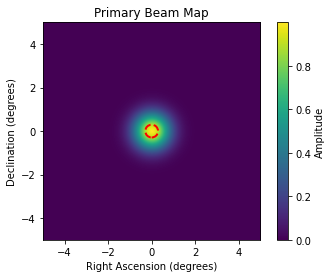

Half-Power Beam Width (HPBW): 1.174 degrees


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Parameters
D = 25.0  # Diameter of the antenna (m)
wavelength = 0.21  # Wavelength of the observed signal (m)
fov_deg = 10  # Field of View in degrees
fov_image_size = 500  # Image size in pixels

# Compute the Gaussian beam width (θ) in degrees
theta = 1.22 * (wavelength / D)
theta_deg = np.degrees(theta)
HPBW_deg = theta_deg

# Create a 2D grid for the FoV map
x = np.linspace(-fov_deg / 2, fov_deg / 2, fov_image_size)
y = np.linspace(-fov_deg / 2, fov_deg / 2, fov_image_size)
X, Y = np.meshgrid(x, y)

# Compute the distance from the center of the beam (θ) for each point on the grid
R = np.sqrt(X**2 + Y**2)

# Compute the Gaussian beam pattern (B) for the grid
a = 1 / (2 * theta_deg**2)
B = np.exp(-a * R**2)

# Print the dimensions of the primary beam
print(f"Primary beam dimensions: {B.shape}")

# Plot the primary beam map
fig, ax = plt.subplots()
plt.imshow(B, cmap="viridis", extent=[-fov_deg / 2, fov_deg / 2, -fov_deg / 2, fov_deg / 2])
circle = Circle((0, 0), HPBW_deg / 2, fill=False, edgecolor='red', linestyle='--', linewidth=2)
ax.add_patch(circle)
plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")
plt.title("Primary Beam Map")
plt.colorbar(label='Amplitude')
plt.show()

D = 25.0  # Diameter of the antenna (m)
wavelength = 0.21  # Wavelength of the observed signal (m)

# Compute the Gaussian beam width (θ) in degrees
theta = 1.22 * (wavelength / D)
theta_deg = np.degrees(theta)

# Calculate the half-power beam width (HPBW)
HPBW_deg = 2 * theta_deg

print(f"Half-Power Beam Width (HPBW): {HPBW_deg:.3f} degrees")


This code simulates the primary beam map of a single radio telescope antenna, its diameter and the wavelength of the observed signal given. The primary beam is represented as a 2D Gaussian function, and the code visualizes the beam pattern as an image with its HPBW value.

After importing the necessary libraries, define the parameters of the antenna and observation, including the diameter of the antenna, the wavelength of the observed signal, the field of view in degrees, and the image size in pixels.Compute the Gaussian beam width (θ) in degrees using the following equation. Create a 2D grid representing the field of view map, using numpy.linspace and numpy.meshgrid. Compute the distance from the center of the beam (θ) for each point on the grid. Compute the Gaussian beam pattern (B) for the grid using the following equation:
B = exp(-a * R^2)
a = 1 / (2 * θ_deg^2), Here, R is the distance from the center of the beam, and 'a' is a normalization factor. Print the dimensions of the primary beam map. Plot the primary beam map using matplotlib.pyplot.imshow, with colormap "viridis" and appropriate axis labels and title. Create a subplot to create a circle to replresent the HPBW within the primary beam. Add a color bar to display the amplitude of the primary beam

Equations used:

1. Angular resolution of a circular aperture antenna:
θ = 1.22 * (wavelength / D)
2. Gaussian beam pattern:
B = exp(-a * R^2)
a = 1 / (2 * θ_deg^2)

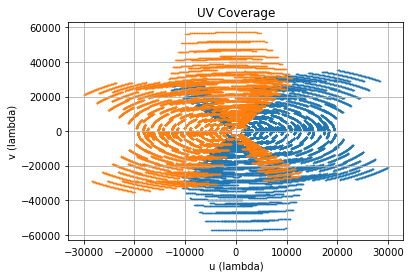

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
from astropy import constants as const
# Define source positions and flux densities
source_1 = SkyCoord('05h00m00s', '+45d00m00s', frame='icrs')
source_2 = SkyCoord('05h00m10s', '+45d03m00s', frame='icrs')

flux_density_1 = 3.6 * u.Jy
flux_density_2 = 5.8 * u.Jy

# Define the EVLA D-configuration antenna positions (use actual positions for your case)
antenna_positions = np.array([ [76.69, 11.67, -108.36],
    [49.29, -123.87, -67.42],
    [96.46, -248.46, -136.94],
    [156.49, -407.06, -225.51],
    [228.83, -597.84, -331.98],
    [311.96, -817.22, -454.39],
    [405.70, -1064.49, -592.36],
    [509.53, -1338.54, -745.23],
    [623.12, -1638.19, -912.51],
    [151.26, 23.33, -218.44],
    [37.71, 135.65, -50.59],
    [73.37, 271.95, -103.23],
    [118.76, 445.77, -170.46],
    [173.02, 653.27, -250.51],
    [235.66, 893.16, -343.18],
    [305.29, 1163.76, -448.46],
    [381.68, 1463.33, -565.35],
    [465.79, 1790.89, -692.95],
    [2.24, 0.05, 1.71],
    [-100.24, -15.93, 152.45],
    [-174.91, -27.56, 262.39],
    [-249.59, -39.15, 372.31],
    [-361.68, -56.66, 537.09],
    [-495.22, -77.43, 733.79],
    [-645.82, -100.90, 955.52],
    [-812.58, -126.88, 1200.98],
    [-995.39, -155.53, 1469.71]])


c = 3e8  # Speed of light (m/s)


def calculate_uv_coverage(antenna_positions, ha_range, obs_frequency, integration_time):
    num_antennas = antenna_positions.shape[0]
    num_baselines = num_antennas * (num_antennas - 1) // 2
    num_timesteps = int((ha_range[1] - ha_range[0]) * 3600 / integration_time)
    
    uv_coverage = np.zeros((num_baselines * num_timesteps, 2))
    
    row = 0
    for i in range(num_antennas):
        for j in range(i + 1, num_antennas):
            baseline = antenna_positions[i] - antenna_positions[j]
            for t in np.linspace(ha_range[0], ha_range[1], num_timesteps):
                hour_angle = t * u.hourangle
                earth_rotation = np.array([[np.cos(hour_angle), np.sin(hour_angle), 0], 
                                           [-np.sin(hour_angle), np.cos(hour_angle), 0], 
                                           [0, 0, 1]])
                uvw = earth_rotation @ baseline
                uvw /= (const.c / (obs_frequency*u.Hz)).value
                uv_coverage[row] = uvw[:2]
                row += 1
                
    return uv_coverage

# Calculate UV coverage
uv_coverage = calculate_uv_coverage(antenna_positions, ha_range=(-0.5, 0.5), obs_frequency=5e9, integration_time=30)

# Plot the UV coverage
plt.scatter(uv_coverage[:, 0], uv_coverage[:, 1], marker='.', s=1)
plt.scatter(-uv_coverage[:, 0], -uv_coverage[:, 1], marker='.', s=1)  # Add the conjugate points
plt.xlabel('u (lambda)')
plt.ylabel('v (lambda)')
plt.title('UV Coverage')
plt.grid()
plt.show()

This code calculates and plots the UV coverage for an array of radio antennas observing the sky at a specific frequency. UV coverage represents the spatial frequencies sampled by a radio interferometer, which can be used to generate an image of the sky. The code uses the antenna positions, hour angle range, observation frequency, and integration time to calculate the UV coverage.

After importing the necessary libraries, define the positions and flux densities of two sources in the sky using SkyCoord from the astropy.coordinates module. Define the antenna positions of the EVLA D-configuration using a NumPy array. Define the speed of light, c(m/s). Create a function calculate_uv_coverage to calculate the UV coverage for the antenna positions, hour angle range, observation frequency, and integration time. The function does: Calculate the number of antennas, baselines, and timesteps. Initialize an empty UV coverage array. Iterate over all pairs of antennas, calculating the baseline for each pair. Iterate over the timesteps, calculating the hour angle for each timestep. Calculate the Earth rotation matrix for the current hour angle. Calculate the UVW coordinates for the current baseline and hour angle by multiplying the Earth rotation matrix and the baseline. Normalize the UVW coordinates by dividing by the wavelength (calculated from the speed of light and observation frequency). Store the u and v components of the UVW coordinates in the UV coverage array. Calculate the UV coverage using the calculate_uv_coverage function with the given parameters. Plot the UV coverage using matplotlib.pyplot.scatter, including the conjugate points.

Equations used:
1. UVW coordinates for a given baseline and hour angle:
uvw = earth_rotation @ baseline
2. Normalization of UVW coordinates:
uvw /= (const.c / (obs_frequency * u.Hz)).value

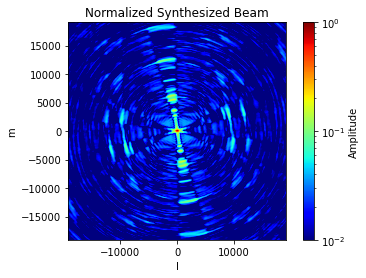

Resolution (l): 447.27
Resolution (m): 223.64


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from matplotlib.colors import LogNorm

# Create a grid in the UV plane
uv_grid_size = 1024
uv_max = np.max(np.abs(uv_coverage))
uv_grid = np.zeros((uv_grid_size, uv_grid_size))

# Populate the grid with the UV coverage points and their conjugates
for uv_point in uv_coverage:
    u_idx = int(uv_point[0] / (2 * uv_max) * uv_grid_size) + uv_grid_size // 2
    v_idx = int(uv_point[1] / (2 * uv_max) * uv_grid_size) + uv_grid_size // 2
    uv_grid[v_idx, u_idx] += 1
    uv_grid[uv_grid_size - v_idx - 1, uv_grid_size - u_idx - 1] += 1

# Compute the 2D FFT of the UV grid and shift the result
synthesized_beam = fftshift(fft2(uv_grid))

# Normalize the synthesized beam to have a maximum of 1.0
synthesized_beam_normalized = np.abs(synthesized_beam) / np.max(np.abs(synthesized_beam))

# Find the indices of the maximum value (central bright spot)
max_indices = np.unravel_index(np.argmax(synthesized_beam_normalized, axis=None), synthesized_beam_normalized.shape)

# Estimate the FWHM by finding the points where the amplitude drops to half of the maximum value
half_max = 0.5
l_profile = synthesized_beam_normalized[max_indices[0], :]
m_profile = synthesized_beam_normalized[:, max_indices[1]]

l_indices = np.where(l_profile >= half_max)[0]
m_indices = np.where(m_profile >= half_max)[0]

l_width = l_indices[-1] - l_indices[0]
m_width = m_indices[-1] - m_indices[0]

# Compute the resolution in terms of the l and m coordinates
extent = [-uv_max, uv_max, -uv_max, uv_max]
resolution_l = (extent[1] - extent[0]) * l_width / uv_grid_size
resolution_m = (extent[3] - extent[2]) * m_width / uv_grid_size

# Define plot settings
center = [0, 0]
zoom_factor = 6
xlim = [center[0] - (extent[1] - extent[0]) / zoom_factor, center[0] + (extent[1] - extent[0]) / zoom_factor]
ylim = [center[1] - (extent[3] - extent[2]) / zoom_factor, center[1] + (extent[3] - extent[2]) / zoom_factor]

# Plot the normalized synthesized beam
plt.imshow(synthesized_beam_normalized, extent=extent, origin='lower', cmap='jet', norm=LogNorm(vmin=1e-2, vmax=1.0))
plt.xlabel('l')
plt.ylabel('m')
plt.title('Normalized Synthesized Beam')
plt.colorbar(label='Amplitude')
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

print(f"Resolution (l): {resolution_l:.2f}")
print(f"Resolution (m): {resolution_m:.2f}")

This code computes and plots the normalized synthesized beam of a radio interferometer using the UV coverage. The synthesized beam represents the response of the interferometer to a point source in the sky and is a measure of the instrument's resolution.

After importing the necessary libraries, create a grid in the UV plane, with a size specified by uv_grid_size. The uv_max variable is calculated as the maximum absolute value of the previously calculated UV coverage. The grid is filled with the UV coverage points and their conjugates. Compute the 2D Fast Fourier Transform (FFT) of the UV grid using the fft2 function from the scipy.fft module. Shift the zero-frequency component to the center of the spectrum. Normalize the synthesized beam to have a maximum of 1.0, and store it in the synthesized_beam_normalized variable. Find the indices of the central bright spot in the normalized synthesized beam. Estimate the Full Width at Half Maximum (FWHM) by finding the points where the amplitude drops to half of the maximum value (0.5). This is done separately for the l and m coordinates (l_profile and m_profile). The resolution in terms of the l and m coordinates by calculating the widths (l_width and m_width) and converted them to the absolute coordinate system using the extent variable.Plot the normalized synthesized beam using matplotlib.pyplot.imshow with a logarithmic color scale. Print the calculated resolution in the l and m coordinates.

Equations used:
1. Computation of the 2D FFT and normalization:
synthesized_beam = fftshift(fft2(uv_grid))
synthesized_beam_normalized = np.abs(synthesized_beam) / np.max(np.abs(synthesized_beam))
2. Computation of resolution in l and m coordinates:
resolution_l = (extent[1] - extent[0]) * l_width / uv_grid_size
resolution_m = (extent[3] - extent[2]) * m_width / uv_grid_size

REFERENCES:

1. https://science.nrao.edu/facilities/alma/CDE_V2.0_INTERFEROMETRY.pdf
2. https://matplotlib.org/stable/plot_types/arrays/index.html
3. https://numpy.org/doc/stable/reference/routines.fft.html
4. https://www.dropbox.com/s/obmmlk1j1e4s7i4/wilner_radio_anita.pdf?dl=0
5. https://www.cv.nrao.edu/~sransom/web/A5.html
6. https://science.nrao.edu/facilities/vla/docs/manuals/oss2012B/overview
7. https://www.youtube.com/playlist?list=PL3jLiVc5sr3P7Uov0VFsEfwPOEG1rF-FO
8. Thompson, A. R., Moran, J. M., & Swenson, G. W. (2017). Interferometry and Synthesis in Radio Astronomy. Wiley-VCH. https://onlinelibrary.wiley.com/doi/book/10.1002/9783527617845
9. Taylor, G. B., Carilli, C. L., & Perley, R. A. (Eds.). (1999). Synthesis Imaging in Radio Astronomy II. Astronomical Society of the Pacific Conference Series. https://ui.adsabs.harvard.edu/abs/1999ASPC..180.....T/abstract
10. Bridle, A. H., & Schwab, F. R. (1999). Wide-Field Imaging I: Bandwidth and Time-Average Smearing. In G. B. Taylor, C. L. Carilli, & R. A. Perley (Eds.), Synthesis Imaging in Radio Astronomy II. Astronomical Society of the Pacific Conference Series. https://ui.adsabs.harvard.edu/abs/1999ASPC..180..371B/abstract
11. Cornwell, T. J., & Fomalont, E. B. (1999). Self-Calibration. In G. B. Taylor, C. L. Carilli, & R. A. Perley (Eds.), Synthesis Imaging in Radio Astronomy II. Astronomical Society of the Pacific Conference Series. https://ui.adsabs.harvard.edu/abs/1999ASPC..180..187C/abstract
12. Gurvits, L. (n.d.). Lecture notes on Radio Interferometry. Joint Institute for VLBI ERIC. https://www.jive.eu/sites/default/files/attachments/lecture_notes/2018-08/Radio%20Interferometry%20basics%20-%20Gurvits.pdf 